In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [2]:
dataset_for_model = pd.read_csv(r'C:\Users\DELL\Desktop\Flight Ticket Prediction Project\dataset\Preprocessed_flight_data.csv')

In [3]:
dataset_for_model

,index,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,6179.278881,18951.326639,21232.361894,0,21586.758341,21372.529469,0,2.17,1,5953
1,1,6179.278881,18951.326639,20370.676718,0,22231.076098,21372.529469,0,2.33,1,5953
2,2,4091.072742,18951.326639,20370.676718,0,14993.139521,21372.529469,0,2.17,1,5956
3,3,30396.536302,18951.326639,21630.760254,0,18494.598993,21372.529469,0,2.25,1,5955
4,4,30396.536302,18951.326639,21630.760254,0,22231.076098,21372.529469,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,30396.536302,21995.339871,21630.760254,1,23044.371615,20427.661284,1,10.08,49,69265
300149,300149,30396.536302,21995.339871,18179.203331,1,21586.758341,20427.661284,1,10.42,49,77105
300150,300150,30396.536302,21995.339871,20370.676718,1,21586.758341,20427.661284,1,13.83,49,79099
300151,300151,30396.536302,21995.339871,20370.676718,1,23044.371615,20427.661284,1,10.00,49,81585


In [4]:
dataset_for_model.drop(['index'], axis=1, inplace=True)

In [5]:
X = dataset_for_model.drop('price', axis=1)
y = dataset_for_model['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,6179.278881,18951.326639,21232.361894,0,21586.758341,21372.529469,0,2.17,1
1,6179.278881,18951.326639,20370.676718,0,22231.076098,21372.529469,0,2.33,1
2,4091.072742,18951.326639,20370.676718,0,14993.139521,21372.529469,0,2.17,1
3,30396.536302,18951.326639,21630.760254,0,18494.598993,21372.529469,0,2.25,1
4,30396.536302,18951.326639,21630.760254,0,22231.076098,21372.529469,0,2.33,1


In [7]:
y.head()

0    5953
1    5953
2    5956
3    5955
4    5955
Name: price, dtype: int64

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
results = {}
results['Linear Regression'] = {'MSE': mse_linear, 'R2': r2_linear}
results

{'Linear Regression': {'MSE': 49535201.60744208, 'R2': 0.9039051308893868}}

In [10]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train_scaled, y_train)
y_pred_tree = tree_model.predict(X_test_scaled)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
results['Decision Tree'] = {'MSE': mse_tree, 'R2': r2_tree}
results

{'Linear Regression': {'MSE': 49535201.60744208, 'R2': 0.9039051308893868},
 'Decision Tree': {'MSE': 12255954.913449349, 'R2': 0.9762242941379984}}

In [11]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
results['Random Forest'] = {'MSE': mse_rf, 'R2': r2_rf}
results

{'Linear Regression': {'MSE': 49535201.60744208, 'R2': 0.9039051308893868},
 'Decision Tree': {'MSE': 12255954.913449349, 'R2': 0.9762242941379984},
 'Random Forest': {'MSE': 7840958.892702034, 'R2': 0.9847890814199755}}

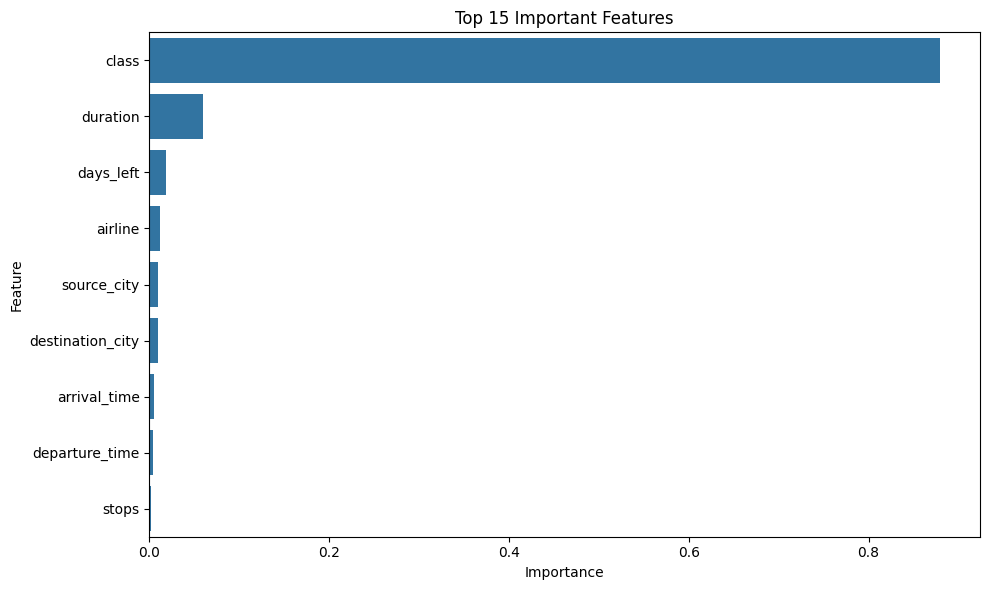

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = rf_model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title('Top 15 Important Features')
plt.tight_layout()
plt.show()

In [13]:
importance_df

,Feature,Importance
6,class,0.879917
7,duration,0.059635
8,days_left,0.018406
0,airline,0.011359
1,source_city,0.010072
5,destination_city,0.009700
4,arrival_time,0.005171
2,departure_time,0.003878
3,stops,0.001863


In [16]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
results['XGBoost'] = {'MSE': mse_xgb, 'R2': r2_xgb}
results

{'Linear Regression': {'MSE': 49535201.60744208, 'R2': 0.9039051308893868},
 'Decision Tree': {'MSE': 12255954.913449349, 'R2': 0.9762242941379984},
 'Random Forest': {'MSE': 7840958.892702034, 'R2': 0.9847890814199755},
 'XGBoost': {'MSE': 12688047.0, 'R2': 0.9753860831260681}}

In [17]:
lightgb_model = lgb.LGBMRegressor()
lightgb_model.fit(X_train_scaled, y_train)
y_pred_lightgb = lightgb_model.predict(X_test_scaled)
mse_lightgb = mean_squared_error(y_test, y_pred_lightgb)
r2_lightgb = r2_score(y_test, y_pred_lightgb)
results['LightGBM'] = {'MSE': mse_lightgb, 'R2': r2_lightgb}
results

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 347
[LightGBM] [Info] Number of data points in the train set: 240122, number of used features: 9
[LightGBM] [Info] Start training from score 20888.572417


c:\Users\DELL\Desktop\Flight Ticket Prediction Project\.conda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


{'Linear Regression': {'MSE': 49535201.60744208, 'R2': 0.9039051308893868},
 'Decision Tree': {'MSE': 12255954.913449349, 'R2': 0.9762242941379984},
 'Random Forest': {'MSE': 7840958.892702034, 'R2': 0.9847890814199755},
 'XGBoost': {'MSE': 12688047.0, 'R2': 0.9753860831260681},
 'LightGBM': {'MSE': 15761055.391838582, 'R2': 0.9694246413504793}}

In [19]:
from sklearn.metrics import mean_absolute_error

mae_results = {}
mae_results['Linear Regression'] = mean_absolute_error(y_test, y_pred_linear)
mae_results['Decision Tree'] = mean_absolute_error(y_test, y_pred_tree)
mae_results['Random Forest'] = mean_absolute_error(y_test, y_pred_rf)
mae_results['XGBoost'] = mean_absolute_error(y_test, y_pred_xgb)
mae_results['LightGBM'] = mean_absolute_error(y_test, y_pred_lightgb)
mae_results

{'Linear Regression': 4530.691152007441,
 'Decision Tree': 1160.6844907908692,
 'Random Forest': 1088.3650053891408,
 'XGBoost': 2035.8785400390625,
 'LightGBM': 2337.4369471480486}

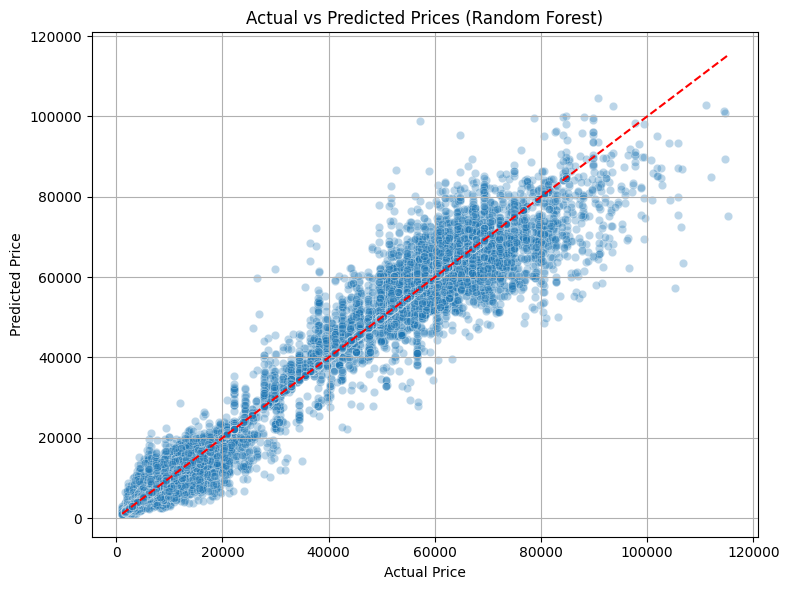

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.3)

# Plotting the ideal line: y = x
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.show()

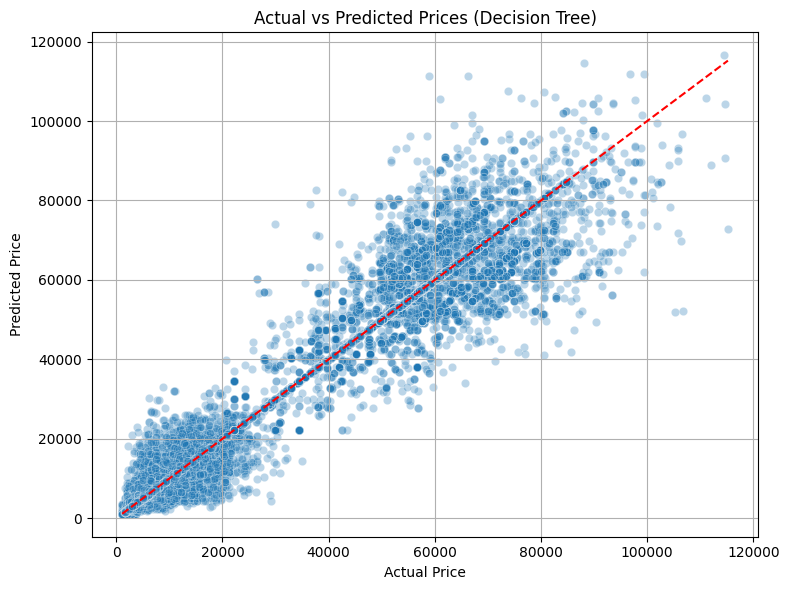

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_tree, alpha=0.3)

# Plotting the ideal line: y = x
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Decision Tree)")
plt.grid(True)
plt.tight_layout()
plt.show()

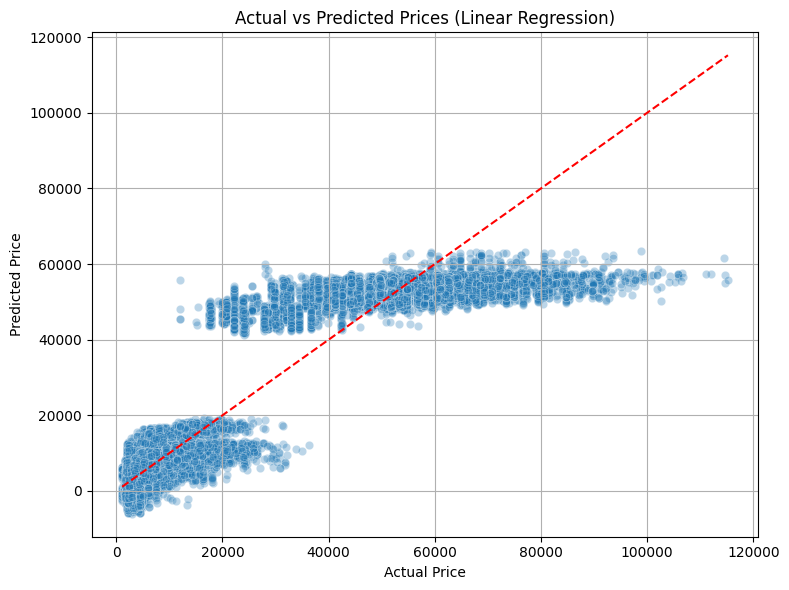

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_linear, alpha=0.3)

# Plotting the ideal line: y = x
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()

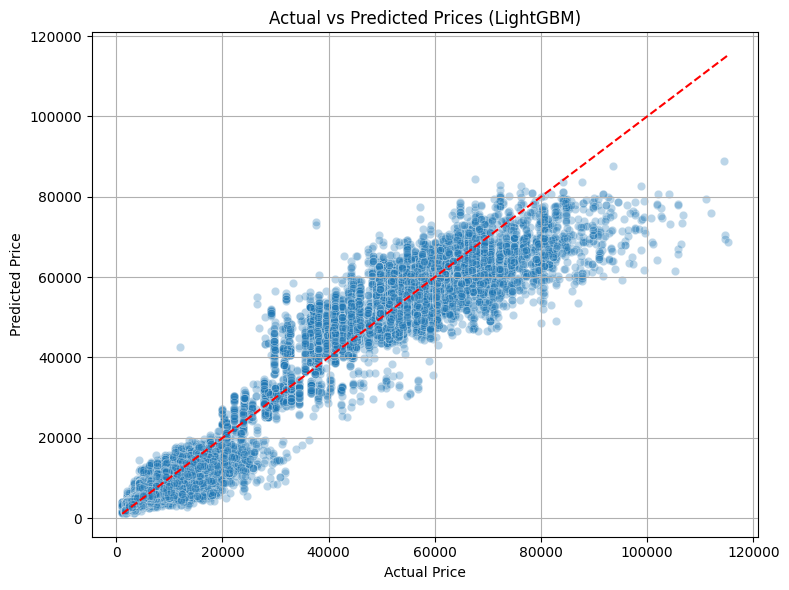

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_lightgb, alpha=0.3)

# Plotting the ideal line: y = x
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (LightGBM)")
plt.grid(True)
plt.tight_layout()
plt.show()

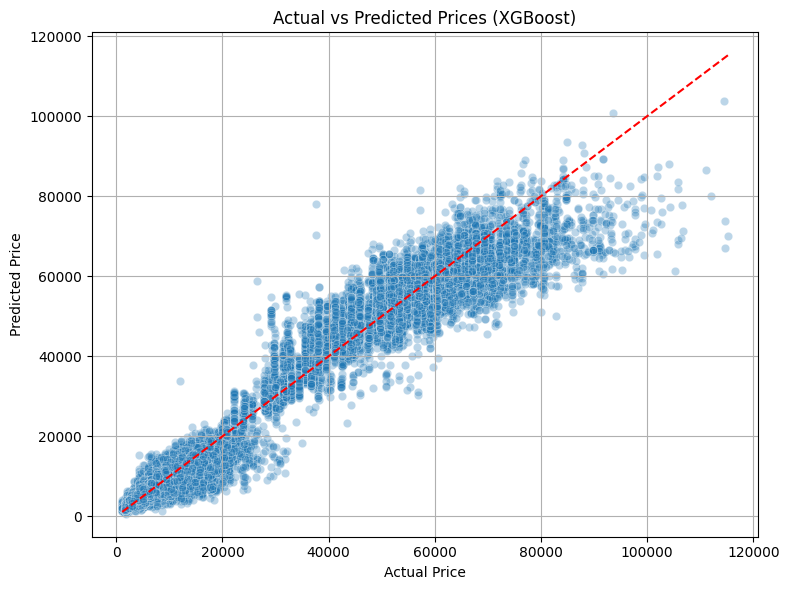

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.3)

# Plotting the ideal line: y = x
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (XGBoost)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
importance_df

,Feature,Importance
6,class,0.879917
7,duration,0.059635
8,days_left,0.018406
0,airline,0.011359
1,source_city,0.010072
5,destination_city,0.009700
4,arrival_time,0.005171
2,departure_time,0.003878
3,stops,0.001863


In [ ]:
dataset_for_model.corr()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
airline,1.000000,0.030086,0.127178,0.157225,0.240180,0.038813,0.444759,0.363964,-0.026092,0.471865
source_city,0.030086,1.000000,0.039552,0.050616,0.019411,-0.251850,0.011461,0.054845,-0.002806,0.049099
departure_time,0.127178,0.039552,1.000000,-0.030094,-0.003514,-0.003454,0.068116,0.131228,-0.008728,0.072732
stops,0.157225,0.050616,-0.030094,1.000000,0.048038,0.107421,0.001027,0.468059,-0.008540,0.119648
arrival_time,0.240180,0.019411,-0.003514,0.048038,1.000000,0.102571,0.102910,0.107965,-0.032615,0.128853
destination_city,0.038813,-0.251850,-0.003454,0.107421,0.102571,1.000000,0.017160,0.105966,-0.006079,0.056619
class,0.444759,0.011461,0.068116,0.001027,0.102910,0.017160,1.000000,0.138710,-0.013039,0.937860
duration,0.363964,0.054845,0.131228,0.468059,0.107965,0.105966,0.138710,1.000000,-0.039157,0.204222
days_left,-0.026092,-0.002806,-0.008728,-0.008540,-0.032615,-0.006079,-0.013039,-0.039157,1.000000,-0.091949
price,0.471865,0.049099,0.072732,0.119648,0.128853,0.056619,0.937860,0.204222,-0.091949,1.000000


In [29]:
dataset_for_model.copy().to_csv(r'copy_of_preprocessed_flight_data.csv', index=False)